In [1]:
# 引入所有需要用到的套件

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, fbeta_score, roc_auc_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')


In [2]:
#讀取csv檔, 並存成dataframe格式

df = pd.read_csv('OP0000524337 Data.csv')
df.head(10)


,iobs,q4,q5,q6,q7,q8,q9,q10,q11,q12,...,q25,q26,q27,q28,q29,q30,q31,q34,Class,wt
0,226,four,one,1,1,two,three,one,0,0,...,0,0,0,0,0,0,0,one,0,1
1,228,one,one,1,1,one,two,one,0,0,...,0,0,0,0,0,0,1,two,0,1
2,233,five,one,1,1,one,three,one,0,0,...,0,0,0,0,0,1,0,one,0,1
3,237,one,one,1,0,one,one,one,0,0,...,0,0,0,0,0,0,1,one,0,1
4,242,three,one,1,1,three,three,one,0,0,...,0,0,0,0,0,1,0,one,0,1
5,247,one,one,1,1,one,two,two,0,0,...,0,0,0,0,0,1,0,one,0,1
6,248,two,one,1,1,one,three,one,0,0,...,0,1,0,0,0,0,0,one,0,1
7,249,one,one,0,0,one,one,one,0,0,...,0,0,0,0,0,1,1,one,0,1
8,250,four,two,1,1,two,two,one,1,0,...,0,0,0,0,0,1,0,three,0,1
9,252,five,three,1,1,three,three,two,1,1,...,0,0,0,0,0,0,0,one,1,1


In [3]:
#印出樣本數及變數數量

print('The shape of our dataset is:', df.shape)
df.describe()


The shape of our dataset is: (1041, 32)


,iobs,q6,q7,q11,q12,q13,q14,q15,q16,q17,...,q24,q25,q26,q27,q28,q29,q30,q31,Class,wt
count,1041.00000,1041.000000,1041.000000,1041.00000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,...,1041.000000,1041.000000,1041.000000,1041.000000,1041.0,1041.000000,1041.000000,1041.000000,1041.000000,1041.0
mean,2005.07781,0.972142,0.805956,0.07877,0.063401,0.032661,0.018252,0.014409,0.007685,0.005764,...,0.059558,0.075889,0.070125,0.000961,0.0,0.014409,0.463016,0.483189,0.215178,1.0
std,1303.10603,0.164644,0.395653,0.26951,0.243799,0.177833,0.133925,0.119228,0.087368,0.075736,...,0.236780,0.264947,0.255480,0.030994,0.0,0.119228,0.498870,0.499958,0.411143,0.0
min,226.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0
25%,815.00000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0
50%,1589.00000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0
75%,3473.00000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,1.0
max,3960.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.0


In [4]:
# 將多元變數做 one-hot encoding

df = pd.get_dummies(df)
df.iloc[:,5:]


,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,...,q8_two,q9_one,q9_three,q9_two,q10_one,q10_two,q34_four,q34_one,q34_three,q34_two
0,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
1037,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
1038,0,0,0,0,0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
1039,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [5]:
# Labels 為我們愈預測的 Y 變數
labels = np.array(df['Class'])

# 將 Labels 與 iobs 捨棄, 另存成 features 變數

features= df.drop(['iobs', 'Class'], axis = 1)


In [6]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 101)

wt_train = train_features['wt']
wt_test = test_features['wt']
train_features = train_features.drop('wt',axis=1)
test_features = test_features.drop('wt',axis=1)


In [7]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 512, random_state = 101)
# Train the model on training data
rf.fit(train_features, train_labels, wt_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=512,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [8]:
# Actual class predictions
rf_predictions = rf.predict(test_features)
# Probabilities for each class
rf_probs = rf.predict_proba(test_features)[:, 1]

In [9]:
cm = confusion_matrix(test_labels, rf_predictions, labels=[0,1], sample_weight=wt_test)
cm

array([[220,  18],
       [ 66,   9]], dtype=int64)

In [10]:
print(classification_report(test_labels, rf_predictions, sample_weight=wt_test))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     238.0
           1       0.33      0.12      0.18      75.0

    accuracy                           0.73     313.0
   macro avg       0.55      0.52      0.51     313.0
weighted avg       0.66      0.73      0.68     313.0



In [11]:
#auc分數
auc_score = roc_auc_score(test_labels, rf_probs)
auc_score

0.6223529411764707

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

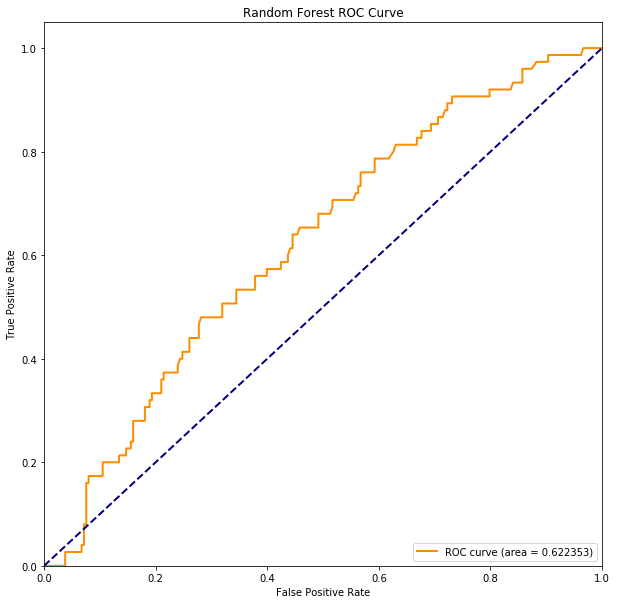

In [12]:
fpr,tpr,threshold = roc_curve(test_labels, rf_probs)
roc_auc = auc(fpr,tpr) 
 
plt.figure()
lw = 2
roc_fig = plt.figure()
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.savefig('ROC Curve.png')
plt.show()

In [13]:
features= df.drop(['wt', 'iobs', 'Class'], axis = 1)
feature_list = list(features.columns)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: q30                  Importance: 0.05709
Variable: q31                  Importance: 0.05596
Variable: q22                  Importance: 0.05165
Variable: q20                  Importance: 0.0498
Variable: q4_three             Importance: 0.03765
Variable: q34_one              Importance: 0.03752
Variable: q34_two              Importance: 0.03729
Variable: q23                  Importance: 0.03669
Variable: q4_five              Importance: 0.03283
Variable: q9_three             Importance: 0.03264
Variable: q19                  Importance: 0.03226
Variable: q8_two               Importance: 0.03172
Variable: q8_one               Importance: 0.03098
Variable: q4_one               Importance: 0.03028
Variable: q34_three            Importance: 0.03015
Variable: q4_two               Importance: 0.02929
Variable: q9_two               Importance: 0.02773
Variable: q10_two              Importance: 0.02686
Variable: q10_one              Importance: 0.02678
Variable: q25                  I

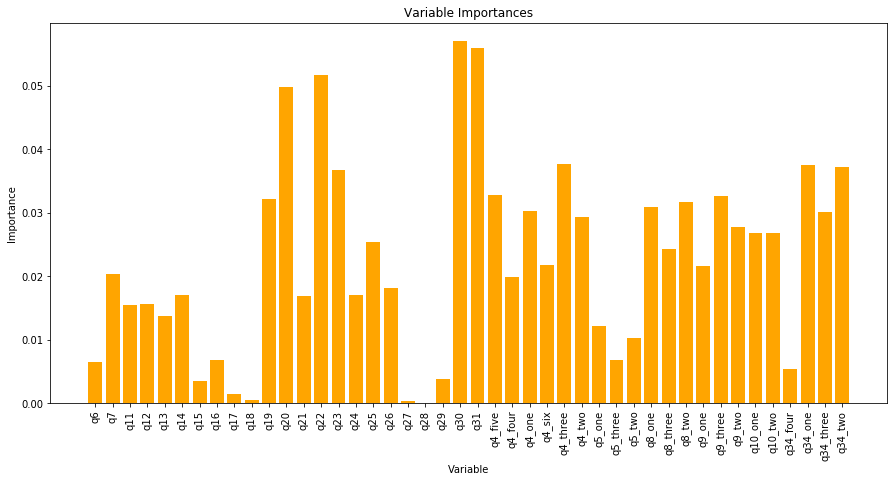

In [14]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.figure(figsize=(15,7))
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical',color='#FFA500')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [15]:
import xlwings as xw

wb = xw.Book()
sheet = wb.sheets[0]
sheet.range("A1").value = feature_importances
sheet.name = "重要性(%)"
wb.save("重要性排序")


In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pydotplus

# New random forest with only the five most important variables
rf_most_important = DecisionTreeClassifier(random_state=101)

# Extract the five most important features
important_indices = [feature_list.index('q30'), feature_list.index('q31'), feature_list.index('q22'), feature_list.index('q20'), feature_list.index('q4_three')]
train_important = train_features.iloc[:, important_indices]
test_important = test_features.iloc[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels, wt_train)
# Extract the small tree

dot_data = StringIO()
export_graphviz(
    rf_most_important,
    out_file=dot_data,
    feature_names=['q30','q31','q22','q20','q4_three'],
    filled=True,rounded=True,special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png('Decision Tree.png')

True

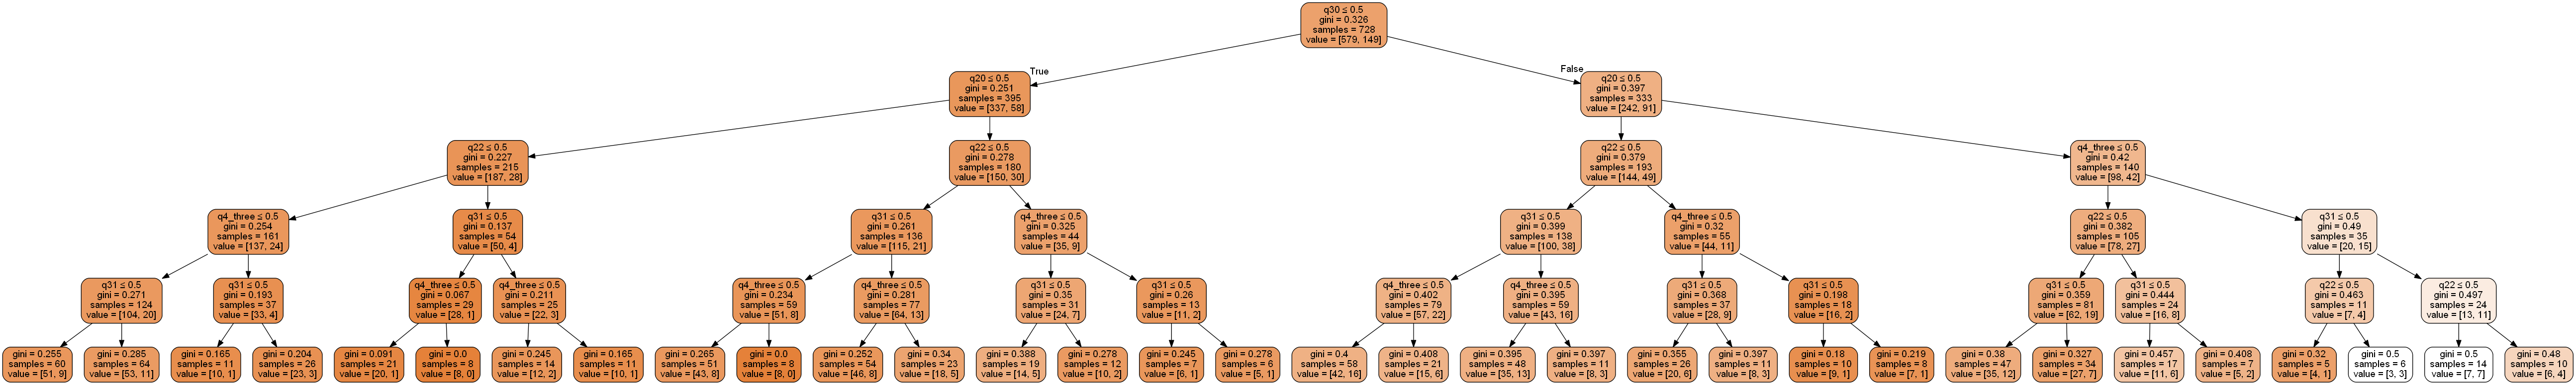

In [17]:
Image(graph.create_png())